# Clima Szeged - Hungria
Sugestões: 
1. Análise Descritiva das Variáveis.
2. Análise de relação entre variáveis.
3. Visualização das análises.
4. Regressão linear simples e múltipla.

Objetivo:
- Criar modelo de regressão linear múltipla de forma a minimizar o “Erro Quadrático Médio” no conjunto de teste.

Entrega:
- Arquivo .csv com apenas uma coluna dos valores alvo estimados [Temperatura]. (com a mesma sequência que foi entregue)

In [1]:
import pandas as pd # Importacao do pandas
import numpy as np # Importacao do numpy
import matplotlib.pyplot as plt # Importacao do matplotlib
import seaborn as sns # Importacao do seaborn

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/MaksonViini/Teste/master/arquivos/weather_szeged_train.csv')

###**Analise Exploratoria dos dados de Treino**

In [3]:
df.head(10)

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Visibility (km),Pressure (millibars)
0,19.400000,19.400000,0.93,6.2790,14.7315,1018.23
1,4.950000,3.122222,1.00,7.8890,5.8926,1000.86
2,22.661111,22.661111,0.38,13.9426,16.0517,1022.64
3,17.044444,17.044444,0.81,12.9766,14.9569,1008.99
4,1.061111,-4.494444,0.56,24.7779,15.8263,1013.73
5,2.238889,-2.650000,0.79,21.9604,10.8192,1008.84
6,3.933333,2.422222,0.76,6.2629,15.8263,1017.12
7,19.105556,19.105556,0.50,12.8800,11.3988,1022.37
8,15.216667,15.216667,0.95,3.0590,15.3111,1023.20
9,8.955556,7.138889,0.99,11.5115,4.0250,1009.19


In [4]:
df.shape # tamanho do dataframe

(8247, 6)

In [5]:
df.isnull().sum() # Verificando valores nulos

Temperature (C)             7249
Apparent Temperature (C)    7249
Humidity                    7249
Wind Speed (km/h)           7249
Visibility (km)             7249
Pressure (millibars)        7249
dtype: int64

In [6]:
df.isna() # Vendo a relacao booleana para os dados NaN

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Visibility (km),Pressure (millibars)
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
8242,True,True,True,True,True,True
8243,True,True,True,True,True,True
8244,True,True,True,True,True,True
8245,True,True,True,True,True,True


In [7]:
df = df.dropna(how='all', axis=0) # Eliminando as linhas NaN, 'axis=0' do dataframe

In [8]:
df.shape

(998, 6)

In [9]:
df.duplicated().sum() # Verificando dados duplicados

0

In [10]:
df.nunique() # A maioria sao dados unicos e que nao se repetem

Temperature (C)             822
Apparent Temperature (C)    868
Humidity                     72
Wind Speed (km/h)           639
Visibility (km)             235
Pressure (millibars)        815
dtype: int64

In [11]:
df.info() # Dados do tipo inteiramente flutuante

<class 'pandas.core.frame.DataFrame'>
Int64Index: 998 entries, 0 to 997
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Temperature (C)           998 non-null    float64
 1   Apparent Temperature (C)  998 non-null    float64
 2   Humidity                  998 non-null    float64
 3   Wind Speed (km/h)         998 non-null    float64
 4   Visibility (km)           998 non-null    float64
 5   Pressure (millibars)      998 non-null    float64
dtypes: float64(6)
memory usage: 54.6 KB


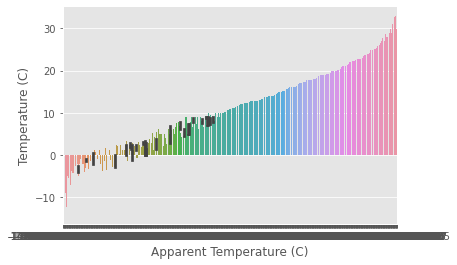

In [12]:
plt.style.use('ggplot')
sns.barplot(x=df['Apparent Temperature (C)'], y=df['Temperature (C)'], data=df) # Relacao temperatura com sensacao terminca

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fad23fe2cf8>,
      dtype=object)

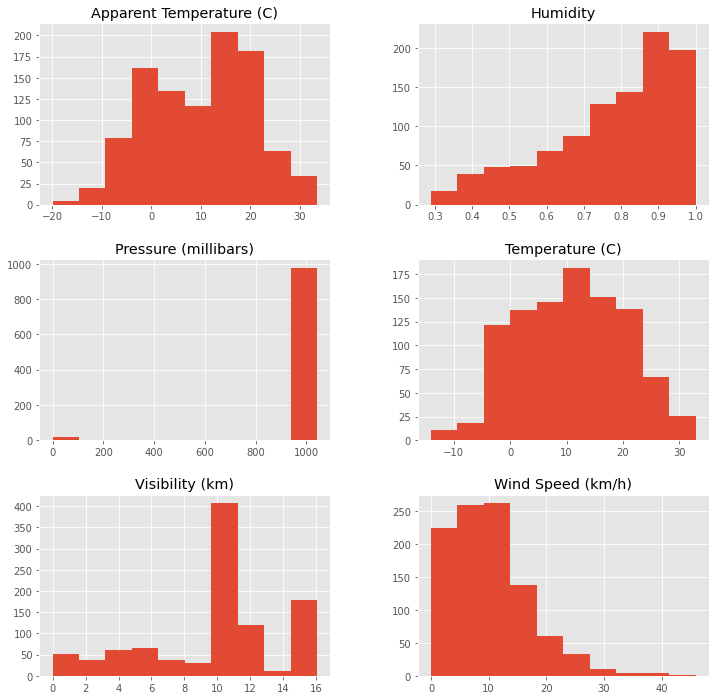

In [13]:
plt.style.use('ggplot') # Unsado ggplot
numeric_cols = df.select_dtypes(include=('float64')).columns

df[numeric_cols[:7]].hist(figsize=(12, 12))  # Selecionando e plotando todas as colunas
# Relacao de quantas cidades tem respectivas dados da coluna em grafico

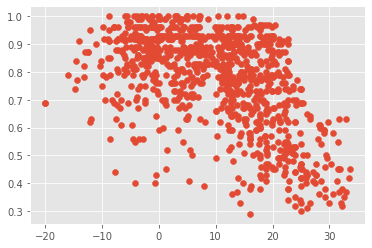

In [14]:
# Grafico de dispersao de sensacao termina em relacao com a humidade
plt.scatter(df['Apparent Temperature (C)'], df['Humidity']) # Humidade maior em locais com temperatura aproximando de 0

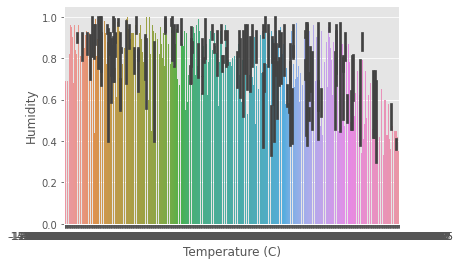

In [15]:
sns.barplot(x=df['Temperature (C)'], y=df['Humidity']) # Relacao da temperatura com a humidade

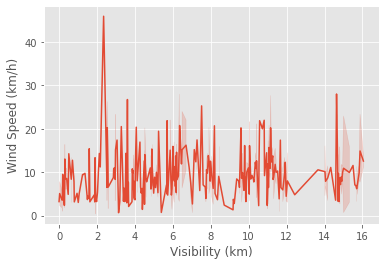

In [16]:
sns.lineplot(x=df['Visibility (km)'], y=df['Wind Speed (km/h)']) # Grafico de linha com a visibilidade e a velocidade do vento

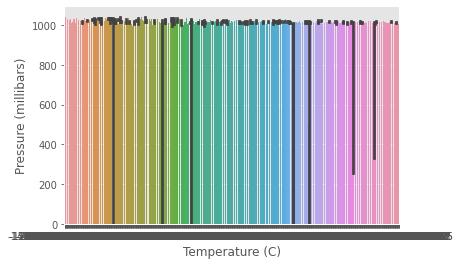

In [17]:
sns.barplot(df['Temperature (C)'], df['Pressure (millibars)']) # Relacao da pressao com a temperatura

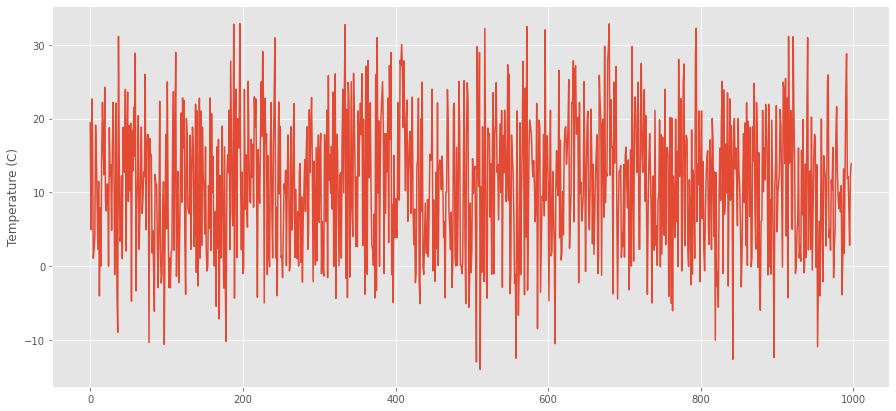

In [18]:
plt.subplots(figsize=(15, 7))
sns.lineplot(x=df.index, y='Temperature (C)', data=df) # Relacao dos indices com a temperatura

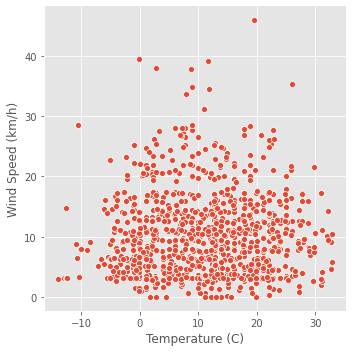

In [19]:
sns.relplot(x='Temperature (C)', y='Wind Speed (km/h)', data=df) # Grafico de relacao temperatura com a velocidade do vento

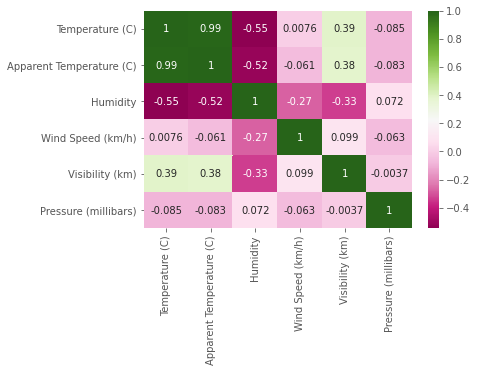

In [20]:
sns.heatmap(df.corr(), annot=True, cmap="PiYG") # Grafico de correlacao

###**Analise Descritiva**

In [21]:
df.describe() # Analise descritiva dos dados

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Visibility (km),Pressure (millibars)
count,998.000000,998.000000,998.000000,998.000000,998.000000,998.00000
mean,10.978084,9.908962,0.773317,10.299289,9.739774,999.05508
std,9.367005,10.594406,0.170484,6.747872,4.016944,139.47797
min,-14.022222,-19.961111,0.290000,0.000000,0.000000,0.00000
25%,2.800000,0.795833,0.670000,4.878300,7.973525,1012.91250
50%,11.622222,11.622222,0.810000,9.378250,9.982000,1017.47500
75%,17.908333,17.908333,0.920000,13.821850,11.270000,1022.61500
max,32.877778,33.566667,1.000000,45.933300,16.051700,1042.83000


In [22]:
df.cov() # Covariância entre os dados

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Visibility (km),Pressure (millibars)
Temperature (C),87.740779,98.514730,-0.873365,0.477994,14.795444,-110.626945
Apparent Temperature (C),98.514730,112.241438,-0.937688,-4.329947,16.345560,-122.073863
Humidity,-0.873365,-0.937688,0.029065,-0.311545,-0.229403,1.709116
Wind Speed (km/h),0.477994,-4.329947,-0.311545,45.533771,2.673193,-59.741102
Visibility (km),14.795444,16.345560,-0.229403,2.673193,16.135838,-2.095567
Pressure (millibars),-110.626945,-122.073863,1.709116,-59.741102,-2.095567,19454.104162


In [23]:
df.corr() # Correlacao entre os dados

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Visibility (km),Pressure (millibars)
Temperature (C),1.000000,0.992713,-0.546905,0.007562,0.393216,-0.084675
Apparent Temperature (C),0.992713,1.000000,-0.519157,-0.060567,0.384085,-0.082611
Humidity,-0.546905,-0.519157,1.000000,-0.270814,-0.334981,0.071876
Wind Speed (km/h),0.007562,-0.060567,-0.270814,1.000000,0.098621,-0.063475
Visibility (km),0.393216,0.384085,-0.334981,0.098621,1.000000,-0.003740
Pressure (millibars),-0.084675,-0.082611,0.071876,-0.063475,-0.003740,1.000000


In [24]:
df.median() # Mediana dos dados

Temperature (C)               11.622222
Apparent Temperature (C)      11.622222
Humidity                       0.810000
Wind Speed (km/h)              9.378250
Visibility (km)                9.982000
Pressure (millibars)        1017.475000
dtype: float64

# **Modelo Regressão Multipla**

In [25]:
# Importando bibliotecas
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [26]:
# definindo o modelo
ln_reg_clima = LinearRegression()

In [27]:
# Definição do target
df_column_target = df["Temperature (C)"]

In [29]:
# Copiando o dataframe
df_reg_mult = df.copy()

In [35]:
df_reg_mult = df_reg_mult.drop('Temperature (C)',axis=1)
df_reg_mult

,Apparent Temperature (C),Humidity,Wind Speed (km/h),Visibility (km),Pressure (millibars)
0,19.400000,0.93,6.2790,14.7315,1018.23
1,3.122222,1.00,7.8890,5.8926,1000.86
2,22.661111,0.38,13.9426,16.0517,1022.64
3,17.044444,0.81,12.9766,14.9569,1008.99
4,-4.494444,0.56,24.7779,15.8263,1013.73
...,...,...,...,...,...
993,12.133333,0.81,4.4919,9.9820,1025.15
994,7.916667,0.92,3.2844,9.9820,1020.29
995,0.611111,0.70,7.8568,9.8049,1020.72
996,12.244444,0.89,1.5295,15.8263,1015.72


In [59]:
# Dividindo o dataset em trieno e teste
X_train_clima, X_test_clima, y_train_clima, y_test_clima = train_test_split(df_reg_mult, df_column_target, test_size=0.30, random_state=42)

In [37]:
# Treinando modelo
ln_reg_clima.fit(X_train_clima, y_train_clima)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
# Gravando as novas predições
pred_clima = ln_reg_clima.predict(X_test_clima)

In [39]:
pred_clima

array([ 13.18543305,  -0.10686279,   8.86197389,   6.85430857,
         1.27667538,  17.13755366,  12.8921546 ,   8.50238027,
        -0.79698616,  13.38122171,  19.06019218,  25.11103851,
        18.13751333,  20.70295349,  20.68254957,  13.59167177,
        -7.04547141,  22.82375914,  22.34540887,  14.77330379,
        23.71768348,   9.55081833,   6.77300382,  -3.16483788,
         3.87190178,  27.0875329 ,  17.46244792,  19.11359867,
        15.50926815,   5.05033809,   7.53971418,  22.89242725,
        16.44308837,  13.33610731,  17.88575965,  13.06139075,
         0.82213494,   3.44307622,  12.90442213,   8.85792981,
        -3.35468455,  13.34067837,  -0.9313139 ,   7.30685977,
        13.22770825,  19.13762614,  16.99817551,  -2.7341307 ,
        18.31656006,  14.65202745,   6.79610248,   0.54864087,
        17.0975707 ,  13.90046187,  21.16036056,  13.53011728,
         2.02058644,  20.93005535,  18.07824554,  20.56356779,
        -6.17363413,   3.65453224,  29.49002022,  18.12

In [40]:
# Avaliação do modelo
print("R2: {:.3f}".format(ln_reg_clima.score(X_test_clima, y_test_clima)))
print("MSE: {}".format(mean_squared_error(y_test_clima, ln_reg_clima.predict(X_test_clima))))

R2: 0.990
MSE: 0.8190103256727762


In [70]:
def train_linear_model(model, X_train, X_test,  y_train, y_test, print_coef=True):

  #não printar com notação científica
  np.set_printoptions(suppress=True)


  #treinando e avaliando o modelo
  model.fit(X_train, y_train)
  print("R2: {:.3f}".format(model.score(X_test, y_test)))
  print("MSE: {}".format(mean_squared_error(y_test, model.predict(X_test))))


In [50]:
from sklearn.linear_model import SGDRegressor

train_linear_model(SGDRegressor(), X_train_clima.values, X_test_clima.values,  y_train_clima.values, y_test_clima.values)

R2: -2203164197257077454018707456.000
MSE: 1.812929406499058e+29


In [51]:
from sklearn.linear_model import Ridge

train_linear_model(Ridge(), X_train_clima.values, X_test_clima.values,  y_train_clima.values, y_test_clima.values)

R2: 0.990
MSE: 0.8197118259040966


In [79]:
from sklearn.linear_model import Lasso

train_linear_model(Lasso(),  X_train_clima.values, X_test_clima.values,  y_train_clima.values, y_test_clima.values)

R2: 0.989
MSE: 0.8789920672467363


In [80]:
from sklearn.linear_model import ElasticNet

train_linear_model(ElasticNet(), X_train_clima.values, X_test_clima.values,  y_train_clima.values, y_test_clima.values)

R2: 0.990
MSE: 0.86295063054898


In [81]:
from sklearn.linear_model import Lars

train_linear_model(Lars(), X_train_clima.values, X_test_clima.values,  y_train_clima.values, y_test_clima.values)

R2: 0.990
MSE: 0.8190103256727749


In [82]:
from sklearn.linear_model import RANSACRegressor

ransac = RANSACRegressor()

train_linear_model(ransac, X_train_clima.values, X_test_clima.values,  y_train_clima.values, y_test_clima.values)

R2: 0.990
MSE: 0.8166042273728853


Regularização dos dados

In [53]:
# Deifindo as variáveis de feature e target
X = df_reg_mult
y = df_column_target

In [60]:
# Dividindo novamente meus dados entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [63]:
# Importando novas bibliotecas
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [72]:
# Treinando e gerando valores preditos
pipe = Pipeline([('scaler', StandardScaler()), 
                 ('logreg', LinearRegression())])
pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logreg',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [73]:
pipe['logreg'].intercept_

10.736071314867848

In [74]:
pipe['logreg'].coef_

array([ 9.35943304, -0.14711396,  0.58825385,  0.02798273,  0.03803717])

In [75]:
#Avaliando o modelo
print("R2: {:.3f}".format(pipe.score(X_test, y_test)))
print("MSE: {}".format(mean_squared_error(y_test, pipe.predict(X_test))))

R2: 0.990
MSE: 0.8190103256727743


Treinando modelo com menos colunas

In [87]:
# definindo o modelo
ln_reg_limpo = LinearRegression()

In [83]:
df_reg_mult

,Apparent Temperature (C),Humidity,Wind Speed (km/h),Visibility (km),Pressure (millibars)
0,19.400000,0.93,6.2790,14.7315,1018.23
1,3.122222,1.00,7.8890,5.8926,1000.86
2,22.661111,0.38,13.9426,16.0517,1022.64
3,17.044444,0.81,12.9766,14.9569,1008.99
4,-4.494444,0.56,24.7779,15.8263,1013.73
...,...,...,...,...,...
993,12.133333,0.81,4.4919,9.9820,1025.15
994,7.916667,0.92,3.2844,9.9820,1020.29
995,0.611111,0.70,7.8568,9.8049,1020.72
996,12.244444,0.89,1.5295,15.8263,1015.72


In [86]:
# Definição do target
df_target = df["Temperature (C)"]

In [85]:
df_feature = df_reg_mult.drop(['Humidity','Pressure (millibars)'],axis=1)
df_feature

,Apparent Temperature (C),Wind Speed (km/h),Visibility (km)
0,19.400000,6.2790,14.7315
1,3.122222,7.8890,5.8926
2,22.661111,13.9426,16.0517
3,17.044444,12.9766,14.9569
4,-4.494444,24.7779,15.8263
...,...,...,...
993,12.133333,4.4919,9.9820
994,7.916667,3.2844,9.9820
995,0.611111,7.8568,9.8049
996,12.244444,1.5295,15.8263


In [88]:
# Dividindo o dataset em trieno e teste e treino do modelo
X_train_limpo, X_test_limpo, y_train_limpo, y_test_limpa = train_test_split(df_feature, df_target, test_size=0.30, random_state=42)
ln_reg_limpo.fit(X_train_limpo,y_train_limpo)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [89]:
# Gravando as novas predições
pred_clima_limpo = ln_reg_limpo.predict(X_test_limpo)

In [91]:
pred_clima_limpo

array([ 13.30841021,  -0.1977674 ,   8.96221598,   6.90325344,
         1.32668607,  17.3103752 ,  13.03133047,   8.56470299,
        -0.8313467 ,  13.39097295,  19.17641718,  25.06441364,
        18.26967164,  20.78466005,  20.82834963,  13.73879818,
        -7.07564298,  22.64006352,  22.49544842,  14.81805788,
        23.79234704,   9.64842262,   6.86254532,  -3.29956183,
         3.99711695,  26.8373121 ,  17.49725746,  19.19261271,
        15.69013047,   4.99378679,   7.59906289,  22.76240947,
        16.51761778,  13.46355149,  18.04787834,  13.21628045,
         0.90216756,   3.46322741,  12.85808103,   8.86091821,
        -3.36556113,  13.43895791,  -0.863365  ,   7.36236723,
        13.18019287,  19.31812247,  16.87753412,  -2.75508807,
        18.20412524,  14.45850905,   6.836644  ,   0.54066163,
        17.23736424,  14.06521331,  21.19265199,  13.53197098,
         1.83359478,  21.03379016,  18.08409307,  20.34245464,
        -6.23630534,   3.68608717,  29.30417647,  18.19

In [92]:
# Avaliação do modelo
print("R2: {:.3f}".format(ln_reg_limpo.score(X_test_limpo, y_test_limpa)))
print("MSE: {}".format(mean_squared_error(y_test_limpa, ln_reg_limpo.predict(X_test_limpo))))

R2: 0.990
MSE: 0.8366280327063998


Montando dataframe para exportação

In [111]:
df_total_exp =pd.DataFrame(pred_clima_limpo, columns=['Temperatura']) 

In [112]:
# Gerando a exportação dos dados
from google.colab import files
df_export.to_csv('ClimaSzeged.csv') 
files.download('ClimaSzeged.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>